In [1]:
%matplotlib inline
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import math

import logging

# Enable logging
logging.basicConfig(format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [2]:
df = pd.read_csv("parkinsons.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


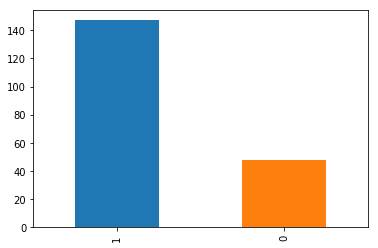

In [4]:
_ = df["status"].value_counts().plot(kind="bar")

In [5]:
data = np.loadtxt("parkinsons.csv",delimiter=',',skiprows=1,usecols=range(1,24))
status = data[:,16]
data = np.delete(data,16,1)
data = np.c_[data,status]
data[0]

array([ 1.199920e+02,  1.573020e+02,  7.499700e+01,  7.840000e-03,
        7.000000e-05,  3.700000e-03,  5.540000e-03,  1.109000e-02,
        4.374000e-02,  4.260000e-01,  2.182000e-02,  3.130000e-02,
        2.971000e-02,  6.545000e-02,  2.211000e-02,  2.103300e+01,
        4.147830e-01,  8.152850e-01, -4.813031e+00,  2.664820e-01,
        2.301442e+00,  2.846540e-01,  1.000000e+00])

In [6]:
def train_test_split(data,train_rate, shuffle=True):
    
    if shuffle:
        np.random.shuffle(data)
    
    train_size = math.floor(train_rate*data.shape[0])

    train_data = data[0: train_size,:]
    test_data = data[train_size:,:]
    
    return train_data,test_data

In [7]:
train,test = train_test_split(data,.8, shuffle=False)
print("Dados de treino: {}".format(train.shape[0]))
print("Dados de teste: {}".format(test.shape[0]))

Dados de treino: 156
Dados de teste: 39


In [8]:
import abc

class LearningAlgorithm():
    __metaclass__ = abc.ABCMeta
    
    @abc.abstractmethod
    def fit(self,X,Y,itter=100):
        return
    
    @abc.abstractmethod
    def predict(self,X):
        return
    
    @abc.abstractmethod
    def score(self,X,Y):
        return

In [9]:
def euclidian_distance(a,b):
    return np.linalg.norm(a-b)

In [10]:
class NearestCentroideClassifier(LearningAlgorithm):
    
    def __init__(self, distanceAlgorithm=euclidian_distance):
        self.distance = distanceAlgorithm
    
    def fit(self,X,Y,itter=100):   
        classes = {}
        for (x,y) in zip(X,Y):
            if not y in classes:
                classes[y] = []
            
            classes[y].append(x)
        
        self.clusters = {}
        for k in classes:
            data = np.array(classes[k])
            cluster = np.mean(data,axis=0)
            self.clusters[k] = cluster
            
    def predict(self,x):
        distances = [(c,self.distance(x,self.clusters[c])) for c in self.clusters]
        distances = sorted(distances,key=lambda x: x[1])
        return distances[0][0]
    
    
    def score(self,X,Y):
        predictions = [1 if self.predict(x)==y else 0 for x,y in zip(X,Y)] 
        return sum(predictions)/len(predictions)

In [11]:
class ConfusionMatrix():
    def __init__(self,label,predicted):
        self.matrix = np.array([[0,0],[0,0]])
        
        for l,p in zip(label,predicted):
            try:
                l = int(l)
                p = int(p)
                self.matrix[l][p] += 1
            except:
                raise Exception("Invalid value. Values must be 0 or 1")
                
    def true_positive(self):
        return self.matrix[1][1]
    
    def true_negative(self):
        return self.matrix[0][0]
    
    def false_positive(self):
        return self.matrix[0][1]
    
    def false_negative(self):
        return self.matrix[1][0]
    
    def sensitivity(self):
        if self.true_positive() == 0:
            return 0
        
        return self.true_positive()/(self.true_positive()+self.false_negative())
            
    def specificity(self):
        if self.true_negative() == 0:
            return 0
        
        return self.true_negative()/(self.true_negative()+self.false_positive())
    
    def precision(self):
        if self.true_positive() == 0:
            return 0
        
        return self.true_positive()/(self.true_positive()+self.false_positive())
        
    
    def accuracy(self):
        return (self.true_positive()+self.true_negative())/(np.sum(self.matrix))
        

In [12]:
model = NearestCentroideClassifier()
model.fit(train[:,:-1],train[:,-1])
predicted = [model.predict(x) for x in test[:,:-1]]
conf_matrix = ConfusionMatrix(test[:,-1],predicted)
print("Sensibilidade: {}%".format(100*conf_matrix.sensitivity()))
print("Especificidade: {}%".format(100*conf_matrix.specificity()))
print("Precisão: {}%".format(100*conf_matrix.precision()))
print("Accuracy: {}%".format(100*conf_matrix.accuracy()))

Sensibilidade: 100.0%
Especificidade: 29.166666666666668%
Precisão: 46.875%
Accuracy: 56.41025641025641%


In [13]:
from collections import Counter


class KNNClassifier(LearningAlgorithm):
    
    def __init__(self,k=10, distanceAlgorithm=euclidian_distance):
        self.k = k
        self.distance = distanceAlgorithm
    
    def fit(self,X,Y,itter=100):
        self.data = [(x,y) for x,y in zip(X,Y)]
        
    def predict(self,x):
        distances = [(d[1],self.distance(x,list(d[0]))) for d in self.data]
        distances = sorted(distances,key=lambda x: x[1])
        top_k = [c for c,_ in distances[:self.k]]
        counter = Counter(top_k)
        return counter.most_common(1)[0][0]
    
    
    def score(self,X,Y):
        predictions = [1 if self.predict(x)==y else 0 for x,y in zip(X,Y)] 
        return sum(predictions)/len(predictions)

In [14]:
model = KNNClassifier(k=10)
model.fit(train[:,:-1],train[:,-1])
predicted = [model.predict(x) for x in test[:,:-1]]
conf_matrix = ConfusionMatrix(test[:,-1],predicted)
print("Sensibilidade: {}%".format(100*conf_matrix.sensitivity()))
print("Especificidade: {}%".format(100*conf_matrix.specificity()))
print("Precisão: {}%".format(100*conf_matrix.precision()))
print("Accuracy: {}%".format(100*conf_matrix.accuracy()))

Sensibilidade: 100.0%
Especificidade: 16.666666666666664%
Precisão: 42.857142857142854%
Accuracy: 48.717948717948715%


In [15]:
class NNClassifier(KNNClassifier):
    def __init__(self, distanceAlgorithm=euclidian_distance):
        KNNClassifier.__init__(self, k=1, distanceAlgorithm=distanceAlgorithm)

In [16]:
model = NNClassifier()
model.fit(train[:,:-1],train[:,-1])
predicted = [model.predict(x) for x in test[:,:-1]]
conf_matrix = ConfusionMatrix(test[:,-1],predicted)
print("Sensibilidade: {}%".format(100*conf_matrix.sensitivity()))
print("Especificidade: {}%".format(100*conf_matrix.specificity()))
print("Precisão: {}%".format(100*conf_matrix.precision()))
print("Accuracy: {}%".format(100*conf_matrix.accuracy()))

Sensibilidade: 93.33333333333333%
Especificidade: 20.833333333333336%
Precisão: 42.42424242424242%
Accuracy: 48.717948717948715%


In [17]:
def generate_mahalanobis_distance(Q):
    def distance_function(x,y):
        z = x - y
        right = np.matmul(Q,z)
        left = np.matmul(z.transpose(),right)
        return math.sqrt(left)
    
    return distance_function

In [18]:
def covariance(X):
    m = np.mean(X,axis=1).transpose()
    n = X.shape[1]
    R = np.matmul(X,X.transpose())/n
    return R - np.outer(m,m.transpose())

In [19]:
def is_invertible(X):
    rank = np.linalg.matrix_rank(X)
    cond = np.linalg.cond(X)
    if rank < X.shape[0]:
        return False, "Matrix isn't inversible because has rank {}".format(rank)
    if cond > 30:
        return False, "Matrix is ill-conditioned({})".format(cond)
    return True, ""

In [20]:
def friedman_regularization(l,g,clusters):
    sk = {}
    
    wk = {}
    
    cov_lambda = {}
    
    for k in clusters:
        data = np.array(clusters[k])
        wk[k] = data.shape[0]
        sk[k] = covariance(data.transpose())*wk[k]
    
    s = sum([sk[k] for k in sk])
    w = sum([wk[k] for k in wk])
    
    for k in clusters:
        wk_lambda = (1-l)*wk[k] + l*w
        sk_lambda = (1-l)*sk[k] + l*s
        cov_lambda[k] = (1/wk_lambda)*sk_lambda
        
    return {
        k: (1-g)*cov_lambda[k] + (g/cov_lambda[k].shape[0])*np.trace(cov_lambda[k])*np.eye(cov_lambda[k].shape[0],cov_lambda[k].shape[0]) \
        for k in clusters
    }

In [21]:
def pooled_covariance(clusters):
    sigma = None
    n = sum([len(clusters[k]) for k in clusters])
    
    for k in clusters:
        data = np.array(clusters[k])
        cov = covariance(data.transpose())
        if sigma is None:
            sigma = (cov.shape[0]/n)*cov
        else:
            sigma += (cov.shape[0]/n)*cov
        
    return sigma
        

In [22]:
class DistanceCell():
        def __init__(self,m,Q):
            self.m = m
            self.distance = generate_mahalanobis_distance(Q)
            
        def calculate(self, x):
            return self.distance(self.m,x)

class QuadraticClassifier(LearningAlgorithm):
    
    def __init__(self,check_invertibility=False,pinv_mode="friedman"):
        self.check_invertibility = check_invertibility
        self.pinv_mode = pinv_mode
    
    def fit(self,X,Y,itter=100):
        classes = {}
        for (x,y) in zip(X,Y):
            if not y in classes:
                classes[y] = []
            
            classes[y].append(x)
        
        self.cells = {}
        
        if self.check_invertibility:
            need_pinv = False
            for k in classes:
                data = np.array(classes[k])
                m = np.mean(data,axis=0)
                cov = covariance(data.transpose())

                invertibility, message = is_invertible(cov)
                if invertibility:
                    self.cells[k] = DistanceCell(m,np.linalg.inv(cov))
                else:
                    need_pinv = True
                    logger.warning(message)
                    break
            
            if need_pinv:
                if self.pinv_mode == "friedman":
                    logger.info("Computing regularized covariances matrices")
                    covs = friedman_regularization(.5,1,classes)
                    for k in classes:
                        m = np.mean(data,axis=0)
                        self.cells[k] = DistanceCell(m,np.linalg.inv(covs[k]))
                        
                elif self.pinv_mode == "pooled":
                    logger.info("Computing pooled covariance matrix")
                    cov = pooled_covariance(classes)
                    inv_cov = np.linalg.inv(cov)
                    for k in classes:
                        m = np.mean(data,axis=0)
                        self.cells[k] = DistanceCell(m,inv_cov)
                else:
                    raise Exception("Invalid pinv method: {}".format(self.pinv_mode))
            
        else:
            for k in classes:
                data = np.array(classes[k])
                m = np.mean(data,axis=0)
                cov = covariance(data.transpose())
                self.cells[k] = DistanceCell(m,np.linalg.inv(cov))
                    
            
    def predict(self, x):
        distances = [(c,self.cells[c].calculate(x)) for c in self.cells]
        distances = sorted(distances,key=lambda x: x[1])
        return distances[0][0]
    
    
    def score(self,X,Y):
        predictions = [1 if self.predict(x)==y else 0 for x,y in zip(X,Y)] 
        return sum(predictions)/len(predictions)

In [23]:
model = QuadraticClassifier(check_invertibility=True,pinv_mode="pooled")
model.fit(train[:,:-1],train[:,-1])
predicted = [model.predict(x) for x in test[:,:-1]]
conf_matrix = ConfusionMatrix(test[:,-1],predicted)
print("Sensibilidade: {}%".format(100*conf_matrix.sensitivity()))
print("Especificidade: {}%".format(100*conf_matrix.specificity()))
print("Precisão: {}%".format(100*conf_matrix.precision()))
print("Accuracy: {}%".format(100*conf_matrix.accuracy()))

2018-10-18 17:30:22,089 - root - WARNING - Matrix isn't inversible because has rank 19
2018-10-18 17:30:22,090 - root - INFO - Computing pooled covariance matrix


Sensibilidade: 100.0%
Especificidade: 0%
Precisão: 38.46153846153847%
Accuracy: 38.46153846153847%


In [24]:
class QuadraticGaussianClassifier(LearningAlgorithm):

    def __init__(self,check_invertibility=False,pinv_mode="friedman"):
        self.check_invertibility = check_invertibility
        self.pinv_mode = pinv_mode

    def fit(self,X,Y,itter=100):   
        classes = {}
        n = X.shape[0]
        for (x,y) in zip(X,Y):
            if not y in classes:
                classes[y] = []
            
            classes[y].append(x)
        
        self.cells = {}
        
        if self.check_invertibility:
            need_pinv = False
            for k in classes:
                data = np.array(classes[k])
                m = np.mean(data,axis=0)
                std = np.std(data,axis=0)
                cov = covariance(data.transpose())
                
                invertibility, message = is_invertible(cov)
                if invertibility:
                    self.cells[k] = {
                        "icov": np.linalg.inv(cov),
                        "cov_det": np.linalg.det(cov),
                        "mean": m,
                        "std": std,
                        "prob_priori": data.shape[0]/n
                    }
                    
                else:
                    need_pinv = True
                    logger.warning(message)
                    break
                
            if need_pinv:
                if self.pinv_mode == "friedman":
                    logger.info("Computing regularized covariances matrices")
                    covs = friedman_regularization(.5,1,classes)
                    for k in classes:
                        m = np.mean(data,axis=0)
                        std = np.std(data,axis=0)
                        cov = covs[k]
                        self.cells[k] = {
                            "icov": np.linalg.inv(cov),
                            "cov_det": np.linalg.det(cov),
                            "mean": m,
                            "std": std,
                            "prob_priori": data.shape[0]/n
                        }

                elif self.pinv_mode == "pooled":
                    logger.info("Computing pooled covariance matrix")
                    cov = pooled_covariance(classes)
                    inv_cov = np.linalg.inv(cov)
                    for k in classes:
                        m = np.mean(data,axis=0)
                        std = np.std(data,axis=0)
                        self.cells[k] = {
                            "icov":inv_cov,
                            "cov_det": np.linalg.det(cov),
                            "mean": m,
                            "std": std,
                            "prob_priori": data.shape[0]/n
                        }
                else:
                    raise Exception("Invalid pinv method: {}".format(self.pinv_mode))
            
        else:
            for k in classes:
                data = np.array(classes[k])
                m = np.mean(data,axis=0)
                std = np.std(data,axis=0)
                cov = covariance(data.transpose())
                self.cells[k] = {
                    "icov": np.linalg.inv(cov),
                    "cov_det": np.linalg.det(cov),
                    "mean": m,
                    "std": std,
                    "prob_priori": data.shape[0]/n
                }
            
    def __prob__(self,x,k):
        s = self.cells[k]["std"]
        m = self.cells[k]["mean"]
        ic = self.cells[k]["icov"]
        cov_det = self.cells[k]["cov_det"]
        prob_priori = self.cells[k]["prob_priori"]
        z = x-m
        return math.log(prob_priori) - 0.5*np.matmul(z, np.matmul(ic,z)) - 0.5*math.log(cov_det)
            
    def predict(self,x):
        distances = [(k,self.__prob__(x,k)) for k in self.cells]
        distances = sorted(distances,key=lambda x: x[1], reverse=True)
        return distances[0][0]
    
    
    def score(self,X,Y):
        predictions = [1 if self.predict(x)==y else 0 for x,y in zip(X,Y)] 
        return sum(predictions)/len(predictions)

In [25]:
model = QuadraticGaussianClassifier(check_invertibility=True, pinv_mode="pooled")
model.fit(train[:,:-1],train[:,-1])
predicted = [model.predict(x) for x in test[:,:-1]]
conf_matrix = ConfusionMatrix(test[:,-1],predicted)
print("Sensibilidade: {}%".format(100*conf_matrix.sensitivity()))
print("Especificidade: {}%".format(100*conf_matrix.specificity()))
print("Precisão: {}%".format(100*conf_matrix.precision()))
print("Accuracy: {}%".format(100*conf_matrix.accuracy()))

2018-10-18 17:30:22,558 - root - WARNING - Matrix isn't inversible because has rank 19
2018-10-18 17:30:22,559 - root - INFO - Computing pooled covariance matrix


Sensibilidade: 100.0%
Especificidade: 0%
Precisão: 38.46153846153847%
Accuracy: 38.46153846153847%


In [26]:
class NormalNaiveBayes(LearningAlgorithm):
   
    def fit(self,X,Y,itter=100):   
        classes = {}
        n = X.shape[0]
        for (x,y) in zip(X,Y):
            if not y in classes:
                classes[y] = []
            
            classes[y].append(x)
        
        self.cells = {}
        for k in classes:
            data = np.array(classes[k])
            m = np.mean(data,axis=0)
            std = np.std(data,axis=0)
            var = np.var(data,axis=0)
            self.cells[k] = {
                "icov": np.linalg.inv(np.diag(var)),
                "cov_det": np.prod(var),
                "mean": m,
                "std": std,
                "prob_priori": data.shape[0]/n
            }
            
    def __prob__(self,x,k):
        s = self.cells[k]["std"]
        m = self.cells[k]["mean"]
        ic = self.cells[k]["icov"]
        cov_det = self.cells[k]["cov_det"]
        prob_priori = self.cells[k]["prob_priori"]
        z = x-m
        return math.log(prob_priori) - 0.5*np.matmul(z, np.matmul(ic,z)) - 0.5*math.log(cov_det)
            
    def predict(self,x):
        distances = [(k,self.__prob__(x,k)) for k in self.cells]
        distances = sorted(distances,key=lambda x: x[1], reverse=True)
        return distances[0][0]
    
    
    def score(self,X,Y):
        predictions = [1 if self.predict(x)==y else 0 for x,y in zip(X,Y)] 
        return sum(predictions)/len(predictions)

In [27]:
model = NormalNaiveBayes()
model.fit(train[:,:-1],train[:,-1])
score = model.score(test[:,:-1],test[:,-1])
print("Naive Bayes Classifier score: {}%".format(score*100))

Naive Bayes Classifier score: 61.53846153846154%


In [28]:
def run_experiments(data):
    logger.setLevel(logging.CRITICAL)
    models = {
        "Nayve Bayes": NormalNaiveBayes(),
        "Quadratic Classifier with pooled covariance": QuadraticClassifier(check_invertibility=True,pinv_mode="pooled"),
        "Quadratic Gaussian Classifier with pooled covariance": QuadraticGaussianClassifier(check_invertibility=True,pinv_mode="pooled"),
        "Quadratic Classifier with Friedman regularization": QuadraticClassifier(check_invertibility=True,pinv_mode="friedman"),
        "Quadratic Gaussian Classifier with Friedman regularization": QuadraticGaussianClassifier(check_invertibility=True,pinv_mode="friedman"),
        "Nearest Centroide Classifier": NearestCentroideClassifier(),
        "KNN Classifier (k=10)": KNNClassifier(k=10),
        "Nearest Neighbor Classifier": NNClassifier()
    }

    results = []
    for model_name in models:
        model = models[model_name]
        min_score = 101
        max_score = -1

        scores = []
        sensitivities = []
        specificities = []
        precisions = []
        for _ in range(100):
            train,test = train_test_split(data,.8, shuffle=True)
            model.fit(train[:,:-1],train[:,-1])

            predicted = [model.predict(x) for x in test[:,:-1]]
            conf_matrix = ConfusionMatrix(test[:,-1],predicted)

            sensitivities.append(conf_matrix.sensitivity())
            specificities.append(conf_matrix.specificity())
            precisions.append(conf_matrix.precision())

            score = conf_matrix.accuracy()
            scores.append(score)

            if score > max_score:
                max_score = score

            if score < min_score:
                min_score = score

        mean = np.mean(scores)
        std = np.std(scores)
        median = np.median(scores)

        results.append({
            "1 - Classificador": model_name,
            "2 - Média": mean,
            "3 - Mediana": median,
            "4 - Min": min_score,
            "5 - Máx": max_score,
            "6 - Desv. Pad.": std,
            "7 - Sensibilidade": np.mean(sensitivities),
            "8 - Especificidade": np.mean(specificities),
            "9 - Precisão": np.mean(precisions)
        })

    return pd.DataFrame(results)

In [29]:
run_experiments(data)

,1 - Classificador,2 - Média,3 - Mediana,4 - Min,5 - Máx,6 - Desv. Pad.,7 - Sensibilidade,8 - Especificidade,9 - Precisão
0,Nayve Bayes,0.710769,0.717949,0.538462,0.871795,0.065380,0.652140,0.895762,0.953930
1,Quadratic Classifier with pooled covariance,0.621282,0.743590,0.102564,0.923077,0.237532,0.750000,0.250000,0.565385
2,Quadratic Gaussian Classifier with pooled cova...,0.633590,0.717949,0.128205,0.871795,0.219296,0.760000,0.240000,0.571282
3,Quadratic Classifier with Friedman regularization,0.262051,0.256410,0.076923,0.769231,0.087974,0.020000,0.980000,0.013846
4,Quadratic Gaussian Classifier with Friedman re...,0.710769,0.769231,0.333333,0.897436,0.136697,0.818146,0.397823,0.793071
5,Nearest Centroide Classifier,0.713333,0.717949,0.589744,0.871795,0.063368,0.738381,0.629679,0.860813
6,KNN Classifier (k=10),0.817179,0.820513,0.641026,0.923077,0.052630,0.949219,0.442689,0.831631
7,Nearest Neighbor Classifier,0.846154,0.846154,0.717949,1.000000,0.049720,0.885411,0.732899,0.911031


In [30]:
data = np.loadtxt("parkinsons.csv",delimiter=',',skiprows=1,usecols=range(1,24))
status = data[:,16]
data = np.delete(data,16,1)
data = np.c_[data,status]
data[0]

array([ 1.199920e+02,  1.573020e+02,  7.499700e+01,  7.840000e-03,
        7.000000e-05,  3.700000e-03,  5.540000e-03,  1.109000e-02,
        4.374000e-02,  4.260000e-01,  2.182000e-02,  3.130000e-02,
        2.971000e-02,  6.545000e-02,  2.211000e-02,  2.103300e+01,
        4.147830e-01,  8.152850e-01, -4.813031e+00,  2.664820e-01,
        2.301442e+00,  2.846540e-01,  1.000000e+00])

In [31]:
mean = np.mean(data[:,:-1], axis=0)
data[:,:-1] = data[:,:-1] - mean
np.mean(data[:,:-1], axis=0)

array([-2.49236529e-14, -4.66407539e-14,  5.02845628e-15, -3.29597460e-18,
       -1.74619100e-20, -1.34997071e-18, -2.35744472e-19,  6.18273239e-18,
        3.09581420e-18, -3.10293102e-17,  1.02304205e-18, -7.09902222e-18,
       -5.87137176e-19,  1.58882878e-17,  4.62592927e-19, -7.41515111e-15,
        9.84967094e-17, -2.94351438e-16, -4.73695157e-16,  1.61978693e-16,
       -2.11796392e-16, -2.41971685e-17])

In [32]:
cov = np.matmul(data[:,:-1].transpose(),data[:,:-1])

In [33]:
values, vectors = np.linalg.eig(cov)
values

array([1.69694607e+06, 5.08028884e+05, 1.18998975e+05, 3.70992640e+03,
       9.30927495e+01, 1.42299877e+01, 2.38000515e+00, 1.09468329e+00,
       6.15634482e-01, 2.68866853e-01, 1.04244929e-01, 8.21629685e-02,
       1.37375806e-02, 3.08815071e-03, 1.49834231e-03, 5.94082820e-04,
       9.76909931e-05, 3.98365688e-05, 1.13400559e-05, 5.06836169e-09,
       1.04230725e-09, 1.26793148e-09])

In [34]:
values = values/sum(values)

In [35]:
for i in range(1,23):
    print("Porcentagem da variância preservada até o {}º componente: {}% ".format(i,100*sum(values[0:i])))

Porcentagem da variância preservada até o 1º componente: 72.89926852958065% 
Porcentagem da variância preservada até o 2º componente: 94.72372997351756% 
Porcentagem da variância preservada até o 3º componente: 99.83581833512055% 
Porcentagem da variância preservada até o 4º componente: 99.9951934183951% 
Porcentagem da variância preservada até o 5º componente: 99.99919259872823% 
Porcentagem da variância preservada até o 6º componente: 99.999803906132% 
Porcentagem da variância preservada até o 7º componente: 99.99990614900109% 
Porcentagem da variância preservada até o 8º componente: 99.99995317560538% 
Porcentagem da variância preservada até o 9º componente: 99.99997962270601% 
Porcentagem da variância preservada até o 10º componente: 99.99999117298289% 
Porcentagem da variância preservada até o 11º componente: 99.99999565125074% 
Porcentagem da variância preservada até o 12º componente: 99.99999918089758% 
Porcentagem da variância preservada até o 13º componente: 99.9999997710516% 

In [36]:
pca_vectors = vectors[:,:3]
pca_vectors.shape

(22, 3)

In [37]:
data = np.c_[np.matmul(data[:,:-1],pca_vectors), data[:,-1]]
data

array([[ 4.97027896e+01,  4.44952429e+01,  3.94012712e+00,
         1.00000000e+00],
       [ 5.43571018e+01,  1.10193357e+01, -1.70300554e+01,
         1.00000000e+00],
       [ 7.28544130e+01,  1.25970091e+01, -1.79171576e+01,
         1.00000000e+00],
       [ 6.63049204e+01,  1.41147678e+01, -1.86510159e+01,
         1.00000000e+00],
       [ 6.27128344e+01,  1.58683560e+01, -1.91903944e+01,
         1.00000000e+00],
       [ 7.17602166e+01,  8.57033144e+00, -1.63179877e+01,
         1.00000000e+00],
       [ 6.58295452e+01,  9.09010469e+00, -1.80255546e+01,
         1.00000000e+00],
       [ 9.23113499e+01,  2.01759461e+01, -1.87019943e+01,
         1.00000000e+00],
       [ 7.82226287e+01,  4.05994977e+01, -2.21001717e+01,
         1.00000000e+00],
       [ 9.00401522e+01,  3.90005996e+01, -2.08034632e+01,
         1.00000000e+00],
       [ 9.97653445e+01,  4.69821686e+01, -2.06013192e+01,
         1.00000000e+00],
       [ 9.52605238e+01,  4.38708622e+01, -1.96620072e+01,
      

In [38]:
run_experiments(data)

,1 - Classificador,2 - Média,3 - Mediana,4 - Min,5 - Máx,6 - Desv. Pad.,7 - Sensibilidade,8 - Especificidade,9 - Precisão
0,Nayve Bayes,0.803846,0.794872,0.641026,0.948718,0.058737,0.913515,0.465495,0.841888
1,Quadratic Classifier with pooled covariance,0.565128,0.564103,0.358974,0.717949,0.070866,0.548614,0.625563,0.820421
2,Quadratic Gaussian Classifier with pooled cova...,0.798718,0.794872,0.615385,0.948718,0.063056,0.916248,0.446281,0.830952
3,Quadratic Classifier with Friedman regularization,0.560000,0.564103,0.230769,0.743590,0.087234,0.537571,0.640132,0.812132
4,Quadratic Gaussian Classifier with Friedman re...,0.791795,0.794872,0.641026,0.897436,0.056326,0.909378,0.418395,0.835027
5,Nearest Centroide Classifier,0.728974,0.717949,0.512821,0.897436,0.060380,0.751846,0.662048,0.870569
6,KNN Classifier (k=10),0.814103,0.820513,0.666667,0.948718,0.061472,0.947015,0.456408,0.828965
7,Nearest Neighbor Classifier,0.822821,0.820513,0.692308,0.948718,0.051550,0.878213,0.652876,0.886339


In [39]:
data = np.loadtxt("parkinsons.csv",delimiter=',',skiprows=1,usecols=range(1,24))
status = data[:,16]
data = np.delete(data,16,1)
data = np.c_[data,status]
data[0]

array([ 1.199920e+02,  1.573020e+02,  7.499700e+01,  7.840000e-03,
        7.000000e-05,  3.700000e-03,  5.540000e-03,  1.109000e-02,
        4.374000e-02,  4.260000e-01,  2.182000e-02,  3.130000e-02,
        2.971000e-02,  6.545000e-02,  2.211000e-02,  2.103300e+01,
        4.147830e-01,  8.152850e-01, -4.813031e+00,  2.664820e-01,
        2.301442e+00,  2.846540e-01,  1.000000e+00])

In [40]:
classes = {}
for (x,y) in zip(data[:,:-1],data[:,-1]):
    if not y in classes:
        classes[y] = []

    classes[y].append(x)

classes = {k: np.array(classes[k]) for k in classes}

means = [np.mean(classes[k], axis = 0) for k in classes]
means

[array([ 1.45180762e+02,  1.88441463e+02,  1.06893558e+02,  6.98925170e-03,
         5.06802721e-05,  3.75748299e-03,  3.90034014e-03,  1.12730612e-02,
         3.36581633e-02,  3.21204082e-01,  1.76757823e-02,  2.02846939e-02,
         2.76004082e-02,  5.30272789e-02,  2.92109524e-02,  2.09740476e+01,
         5.16815918e-01,  7.25407939e-01, -5.33341972e+00,  2.48132667e-01,
         2.45605804e+00,  2.33828224e-01]),
 array([ 1.81937771e+02,  2.23636750e+02,  1.45207292e+02,  3.86604167e-03,
         2.33750000e-05,  1.92500000e-03,  2.05604167e-03,  5.77604167e-03,
         1.76152083e-02,  1.62958333e-01,  9.50354167e-03,  1.05085417e-02,
         1.33047917e-02,  2.85114583e-02,  1.14827083e-02,  2.46787500e+01,
         4.42551875e-01,  6.95715562e-01, -6.75926387e+00,  1.60292000e-01,
         2.15449073e+00,  1.23017104e-01])]

In [41]:
n = data.shape[1]-1

sw = []
m = np.mean(data[:,:-1],axis=0)
sb = []

for mi,k in zip(means,classes):
    ni = len(classes[k])
    sb.append(ni*np.outer(mi-m,mi-m))
    
    s = np.zeros((n,n))
    for x in classes[k]:
        z = x-mi
        s += np.outer(z,z)
    sw.append(s)
    
sw = sum(sw)
sb = sum(sb)

sw.shape,sb.shape

((22, 22), (22, 22))

In [42]:
Z = np.matmul(np.linalg.inv(sw),sb)
values, vectors = np.linalg.eig(Z)

values[0], vectors[0]

((0.9713893180578921+0j),
 array([ 6.71375288e-07+0.00000000e+00j, -6.65562697e-07+0.00000000e+00j,
        -6.98914917e-07+0.00000000e+00j, -6.53311112e-07-6.84039910e-08j,
        -6.53311112e-07+6.84039910e-08j, -1.79622799e-07+0.00000000e+00j,
        -1.80449158e-07+1.49695740e-06j, -1.80449158e-07-1.49695740e-06j,
         1.30404798e-07+0.00000000e+00j, -4.49905070e-08-2.19005306e-08j,
        -4.49905070e-08+2.19005306e-08j, -4.97202603e-08-5.39079712e-08j,
        -4.97202603e-08+5.39079712e-08j,  3.01617277e-06+0.00000000e+00j,
         6.10508192e-08-1.99724149e-07j,  6.10508192e-08+1.99724149e-07j,
        -1.12781924e-07+2.22867214e-07j, -1.12781924e-07-2.22867214e-07j,
        -5.79770723e-08+0.00000000e+00j,  9.59254751e-07-2.91840868e-07j,
         9.59254751e-07+2.91840868e-07j,  3.60977589e-05+0.00000000e+00j]))

In [43]:
values = np.real(values)
vectors = np.real(vectors)
values[0], vectors[0]

(0.9713893180578921,
 array([ 6.71375288e-07, -6.65562697e-07, -6.98914917e-07, -6.53311112e-07,
        -6.53311112e-07, -1.79622799e-07, -1.80449158e-07, -1.80449158e-07,
         1.30404798e-07, -4.49905070e-08, -4.49905070e-08, -4.97202603e-08,
        -4.97202603e-08,  3.01617277e-06,  6.10508192e-08,  6.10508192e-08,
        -1.12781924e-07, -1.12781924e-07, -5.79770723e-08,  9.59254751e-07,
         9.59254751e-07,  3.60977589e-05]))

In [44]:
values = values/sum(values)
for i in range(1,23):
    print("Porcentagem da variância preservada até o {}º componente: {}% ".format(i,100*sum(values[0:i])))

Porcentagem da variância preservada até o 1º componente: 99.99999978537427% 
Porcentagem da variância preservada até o 2º componente: 99.99999999025356% 
Porcentagem da variância preservada até o 3º componente: 100.00000000189789% 
Porcentagem da variância preservada até o 4º componente: 100.00000000093456% 
Porcentagem da variância preservada até o 5º componente: 99.99999999997124% 
Porcentagem da variância preservada até o 6º componente: 100.00000000000372% 
Porcentagem da variância preservada até o 7º componente: 99.99999999999996% 
Porcentagem da variância preservada até o 8º componente: 99.99999999999618% 
Porcentagem da variância preservada até o 9º componente: 100.00000000000114% 
Porcentagem da variância preservada até o 10º componente: 100.00000000000409% 
Porcentagem da variância preservada até o 11º componente: 100.00000000000703% 
Porcentagem da variância preservada até o 12º componente: 100.00000000000557% 
Porcentagem da variância preservada até o 13º componente: 100.0000

In [45]:
lda_vectors = vectors[:,:3]
lda_vectors.shape

(22, 3)

In [46]:
data = np.c_[np.matmul(data[:,:-1],pca_vectors), data[:,-1]]
data.shape

(195, 4)

In [47]:
run_experiments(data)

,1 - Classificador,2 - Média,3 - Mediana,4 - Min,5 - Máx,6 - Desv. Pad.,7 - Sensibilidade,8 - Especificidade,9 - Precisão
0,Nayve Bayes,0.795641,0.794872,0.666667,0.948718,0.059964,0.917900,0.434198,0.827673
1,Quadratic Classifier with pooled covariance,0.574359,0.576923,0.307692,0.717949,0.081327,0.558207,0.624879,0.804402
2,Quadratic Gaussian Classifier with pooled cova...,0.796410,0.794872,0.615385,0.948718,0.066054,0.910986,0.449712,0.833245
3,Quadratic Classifier with Friedman regularization,0.573333,0.589744,0.384615,0.769231,0.073561,0.561901,0.608390,0.816436
4,Quadratic Gaussian Classifier with Friedman re...,0.793590,0.794872,0.435897,0.923077,0.064804,0.903458,0.427397,0.839456
5,Nearest Centroide Classifier,0.710513,0.717949,0.538462,0.871795,0.058840,0.737361,0.620875,0.857132
6,KNN Classifier (k=10),0.816154,0.820513,0.666667,0.948718,0.059036,0.942490,0.435351,0.836699
7,Nearest Neighbor Classifier,0.819231,0.820513,0.692308,0.948718,0.055514,0.873061,0.652654,0.887052
